





### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

In [4]:
# from google.colab import drive
# drive.mount('/content/drive/')

### Importing all the important libraries

In [6]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow.keras import layers, Sequential
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [15]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train")
data_dir_test = pathlib.Path("/content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Test")

In [18]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2242
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [19]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [20]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3070 files belonging to 9 classes.
Using 2456 files for training.


In [21]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3070 files belonging to 9 classes.
Using 614 files for validation.


In [22]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [23]:
print(type(train_ds))

<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [24]:
for images, labels in train_ds.take(1):
  print(len(images))
  print(len(labels))

32
32


32
32


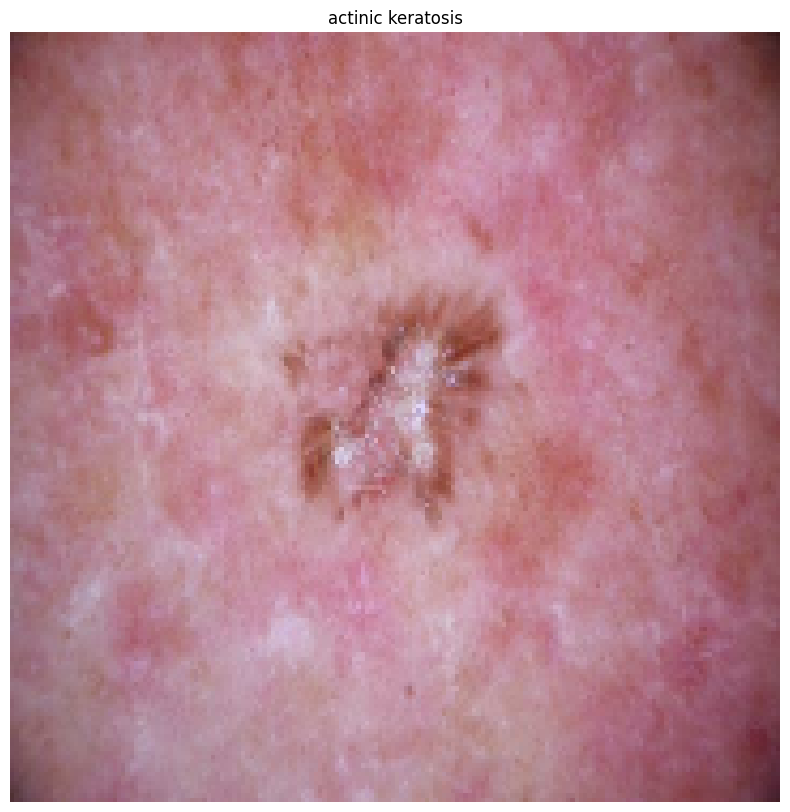

In [25]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  print(len(images))
  print(len(labels))
  plt.imshow(images[10].numpy().astype("uint8"))
  plt.title(class_names[labels[10]])
  plt.axis("off")


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

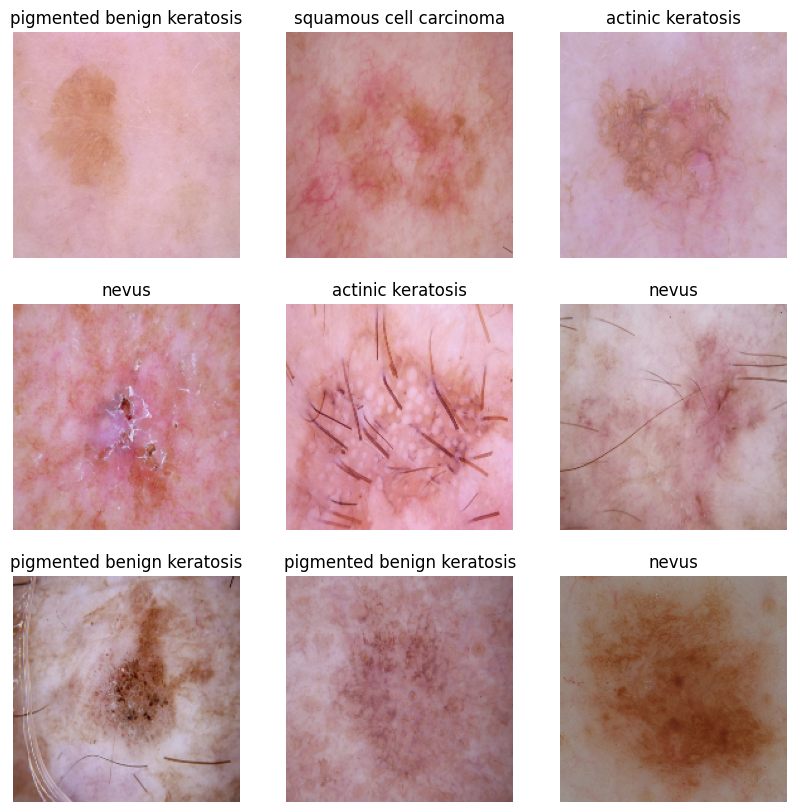

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(5):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### your code goes here, you can use training or validation data to visualize

In [27]:
#print(type(train_ds))
#print(len(train_ds)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [28]:
#overlaps data preprocessing and model execution while training., Speed up training
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [29]:
num_classes = 9

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Removed 'experimental'
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [30]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 90, 90, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      15,859,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           2,313 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,001,705 (61.04 MB)

 Trainable params: 16,001,705 (61.04 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
### Todo, choose an appropirate optimiser and loss function
#RMSprop. RMSprop is a very effective, but currently unpublished adaptive learning rate method
#Adam. Adam is a recently proposed update that looks a bit like RMSProp with momentum. The (simplified) update looks as follows:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

In [32]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 519s 2s/step - accuracy: 0.2922 - loss: 1.9744 - val_accuracy: 0.4414 - val_loss: 1.6440
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 50s 74ms/step - accuracy: 0.4409 - loss: 1.6210 - val_accuracy: 0.5130 - val_loss: 1.4995
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.4843 - loss: 1.5192 - val_accuracy: 0.5375 - val_loss: 1.4067
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.5265 - loss: 1.4096 - val_accuracy: 0.5293 - val_loss: 1.5312
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.5699 - loss: 1.2639 - val_accuracy: 0.5684 - val_loss: 1.3274
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.6166 - loss: 1.1639 - val_accuracy: 0.5814 - val_loss: 1.2914
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.6399 - loss: 1.0463 - val_accuracy: 0.5717 - val_loss: 1.3133
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.6391 - loss: 1.0582 - val_accuracy: 0.601

### Visualizing training results

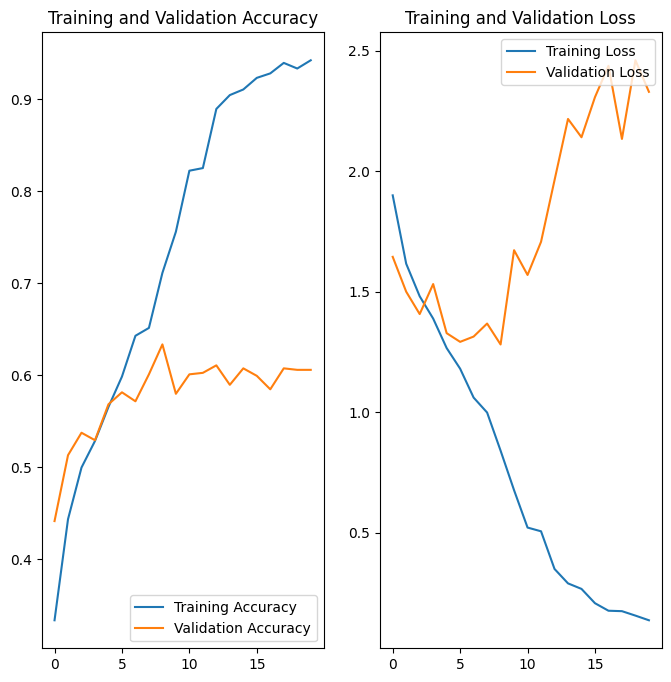

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

##### finding ::
We can see that model train accuracy is 88.2 % while validation accuracy is around 50%. So model is overfitted.

### Chose an appropriate data augmentation strategy to resolve underfitting/overfitting


In [34]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                                    input_shape=(img_height, img_width, 3)), # Removed 'experimental'
    tf.keras.layers.RandomRotation(0.1), # Removed 'experimental'
    tf.keras.layers.RandomZoom(0.1), # Removed 'experimental'
    tf.keras.layers.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0), # Removed 'experimental'
    tf.keras.layers.RandomCrop(img_height,img_width), # Removed 'experimental'
  ]
)

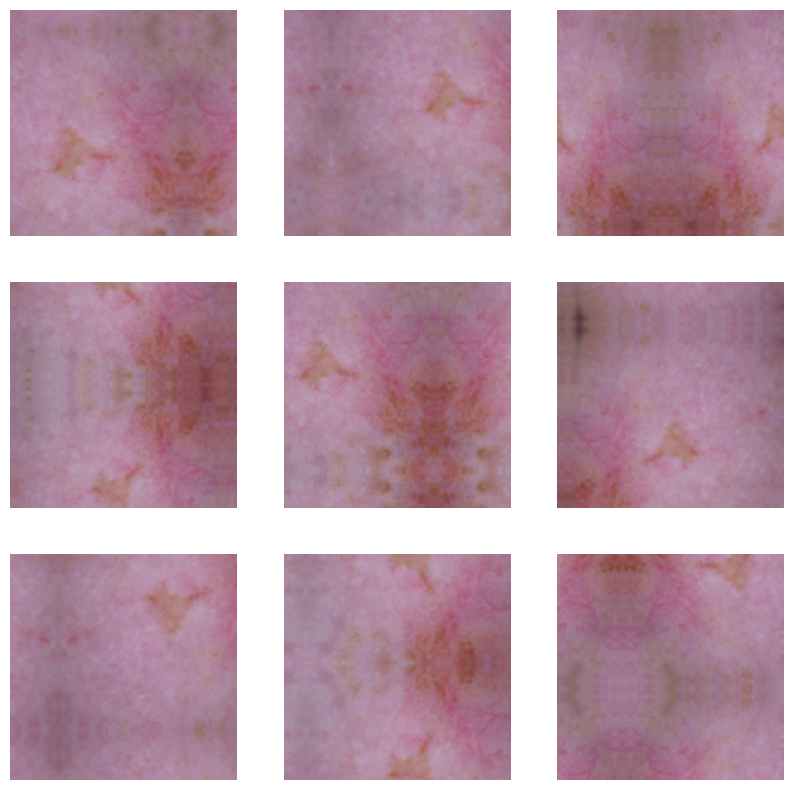

In [35]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Model Building & training on the augmented data

### Todo:
### Create the model, compile and train the model


In [36]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [37]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [38]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 147ms/step - accuracy: 0.2500 - loss: 2.2815 - val_accuracy: 0.3844 - val_loss: 1.9077
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.3211 - loss: 1.9488 - val_accuracy: 0.3599 - val_loss: 1.8362
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - accuracy: 0.3490 - loss: 1.8304 - val_accuracy: 0.3811 - val_loss: 1.7516
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.3652 - loss: 1.7484 - val_accuracy: 0.4104 - val_loss: 1.6876
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.3972 - loss: 1.6925 - val_accuracy: 0.4381 - val_loss: 1.6109
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - accuracy: 0.4426 - loss: 1.6086 - val_accuracy: 0.4625 - val_loss: 1.5300
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.4570 - loss: 1.5351 - val_accuracy: 0.4756 - val_loss: 1.6136
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - accuracy: 0.4404 - loss: 1.5835 - val_accura

### Visualizing the results

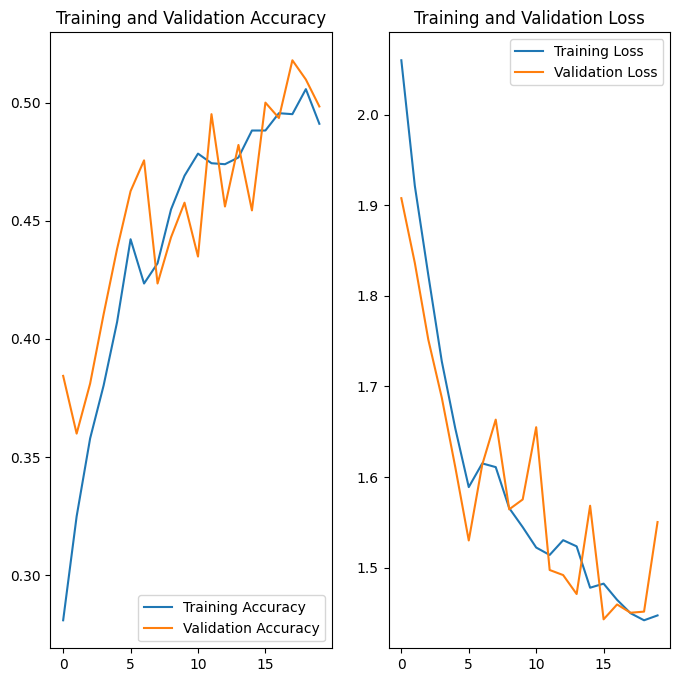

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
#Finding:
# we can see the model is underfit here. Accuracy has dropped a lot.


In [43]:
# For convenience, let us set up the path for the training and validation sets
train_dir = os.path.join("/content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train")
val_dir = os.path.join("/content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Test")

In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Setting batch size and image size
batch_size = 64
IMG_SHAPE = 180

# Create training images generator
#Generate batches of tensor image data with real-time data augmentation.
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
#Then calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images from the subdirectories
train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

# Create validation images generator
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 3070 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [46]:
#Create a CNN model
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

# Import layers explicitly to keep our code compact
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D


model = Sequential()

#2D convolution layer (e.g. spatial convolution over images).
model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Dropout(0.2))

#Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, padding='same', activation='relu'))

model.add(Dropout(0.2))
#Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input.
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, 3, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

#Flattens the input. Does not affect the batch size.
model.add(Flatten())

#The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
model.add(Dense(256, activation='relu'))

#Just your regular densely-connected NN layer.
model.add(Dense(9))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
epochs = 20

history = model.fit(
  train_data_gen,
  validation_data=val_data_gen,
  epochs=20
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


48/48 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.2584 - loss: 2.1711 - val_accuracy: 0.2288 - val_loss: 2.0589
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.3578 - loss: 1.8475 - val_accuracy: 0.2712 - val_loss: 1.9759
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4580 - loss: 1.5681 - val_accuracy: 0.3305 - val_loss: 1.9635
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.4715 - loss: 1.5373 - val_accuracy: 0.3814 - val_loss: 1.9716
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5344 - loss: 1.4037 - val_accuracy: 0.3898 - val_loss: 1.9570
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.5422 - loss: 1.3423 - val_accuracy: 0.3644 - val_loss: 1.9781
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.5525 - loss: 1.3365 - val_accuracy: 0.3305 - val_loss: 2.0613
Epoch 8/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.5750 - loss: 1.2759 - val_accuracy: 0.3136 - val_loss: 2.1038
E

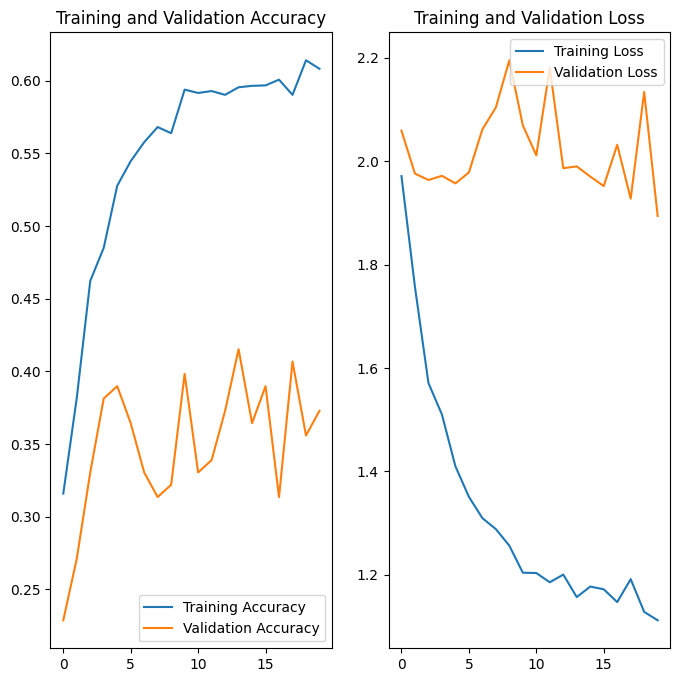

In [47]:
import matplotlib.pyplot as plt
epochs=20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)



plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?


In [48]:
# We see that model is under fitted.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [49]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2242

In [50]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/CNN_assignment/Skin_can...,basal cell carcinoma
1,/content/drive/MyDrive/CNN_assignment/Skin_can...,basal cell carcinoma
2,/content/drive/MyDrive/CNN_assignment/Skin_can...,basal cell carcinoma
3,/content/drive/MyDrive/CNN_assignment/Skin_can...,basal cell carcinoma
4,/content/drive/MyDrive/CNN_assignment/Skin_can...,basal cell carcinoma
...,...,...
2237,/content/drive/MyDrive/CNN_assignment/Skin_can...,vascular lesion
2238,/content/drive/MyDrive/CNN_assignment/Skin_can...,vascular lesion
2239,/content/drive/MyDrive/CNN_assignment/Skin_can...,vascular lesion
2240,/content/drive/MyDrive/CNN_assignment/Skin_can...,vascular lesion


<Figure size 1000x1000 with 0 Axes>

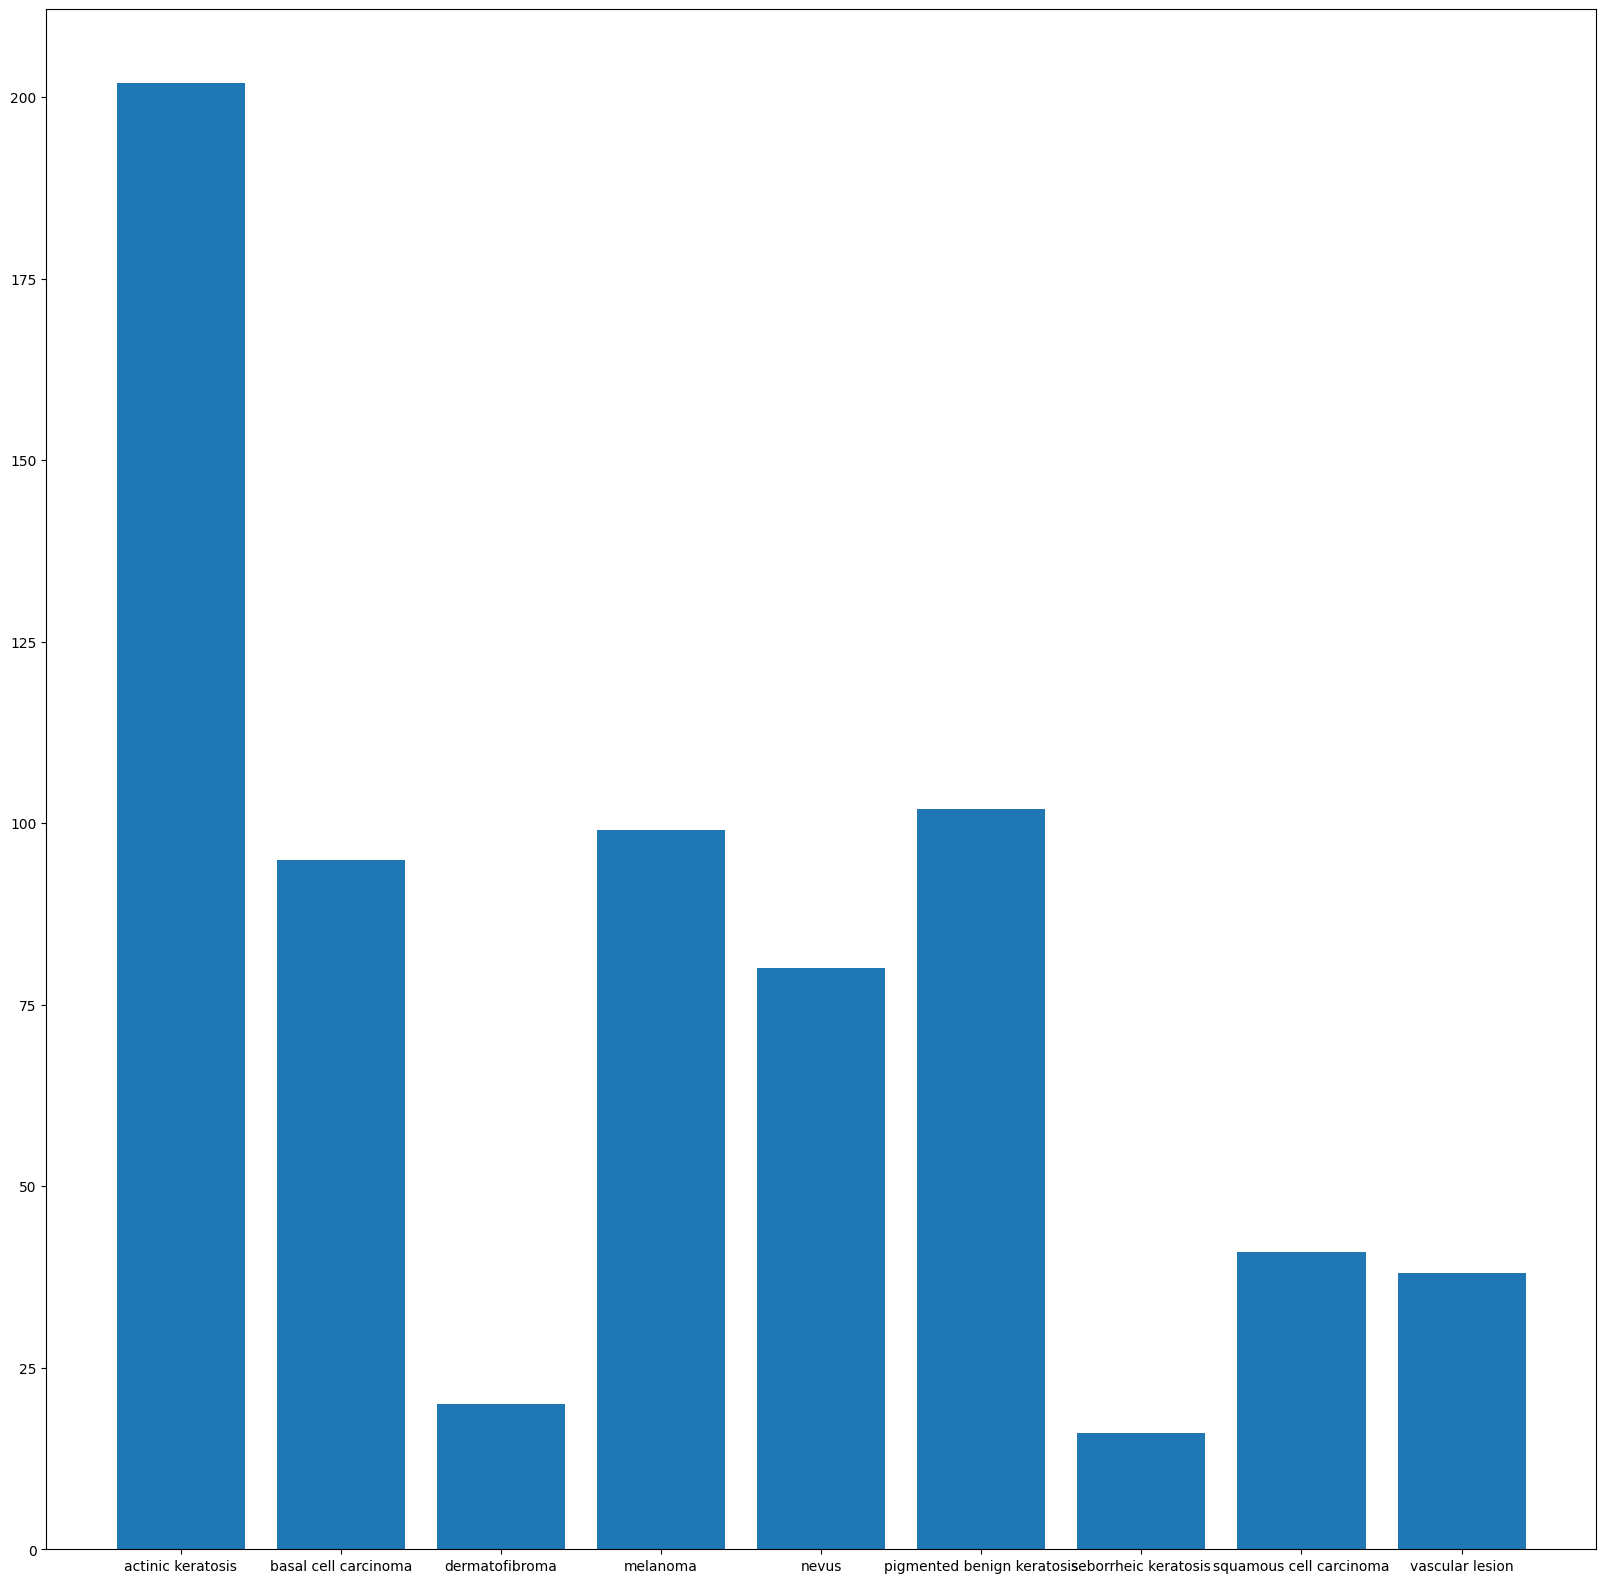

In [51]:
import matplotlib.pyplot as plt
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
  for i in range(9):
    data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i])

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#####  Ans : seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
##### Ans: Malanoma


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [52]:
!pip install Augmentor

In [54]:
datapath=r'/content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis'
import Augmentor
p = Augmentor.Pipeline(datapath)
#Every function requires you to specify a probability, which is used to decide if an operation is applied to an image as it is passed through the augmentation pipeline.
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
p.zoom(probability=0.2, min_factor=1.1, max_factor=1.2)
p.sample(300)
p.process()


Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DAC626879A0>: 100%|██████████| 300/300 [00:13<00:00, 21.85 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DAC625C8160>: 100%|██████████| 114/114 [00:04<00:00, 25.47 Samples/s]


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [56]:
path_to_training_dataset="/content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/"

#import Augmentor
for i in class_names:
  p = Augmentor.Pipeline(path_to_training_dataset + i)
  p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
  p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DAC6242F280>: 100%|██████████| 500/500 [00:17<00:00, 28.35 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DAC6246A590>: 100%|██████████| 500/500 [00:21<00:00, 23.79 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DAC62686F20>: 100%|██████████| 500/500 [00:18<00:00, 26.78 Samples/s]


Initialised with 441 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DAC63C6EE90>: 100%|██████████| 500/500 [01:24<00:00,  5.95 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x7DACE6C45150>: 100%|██████████| 500/500 [01:27<00:00,  5.73 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DACE6C452D0>: 100%|██████████| 500/500 [00:18<00:00, 26.71 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DACE5777820>: 100%|██████████| 500/500 [00:41<00:00, 12.10 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DAC63A841F0>: 100%|██████████| 500/500 [00:18<00:00, 26.47 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DAC63CA96C0>: 100%|██████████| 500/500 [00:21<00:00, 23.67 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [57]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

5742


### Lets see the distribution of augmented data after adding new images to the original training data.

In [58]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0025793.jpg_3e9d03f5-c80d-46fd-b52a-25bfc84f0404.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0026324.jpg_8582b84d-641a-443c-9dec-b9da830c9a54.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0025826.jpg_ea1ba3f8-cb73-4084-bd1a-4acd5427a606.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collaboration/Train/basal cell carcinoma/output/basal cell carcinoma_original_ISIC_0026275.jpg_0ecbde6d-f80a-4a25-a721-26f31f397745.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin_cancer_ISIC_The_International_Skin_Imaging_Collabor

In [59]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [60]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))


In [64]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)

In [65]:
new_df['Label'].value_counts()

Label
actinic keratosis             1856
pigmented benign keratosis     962
melanoma                       941
basal cell carcinoma           876
nevus                          857
squamous cell carcinoma        681
vascular lesion                639
dermatofibroma                 595
seborrheic keratosis           577
Name: count, dtype: int64

Class=1, n=876 (10.972%)
Class=0, n=1856 (23.246%)
Class=7, n=681 (8.530%)
Class=6, n=577 (7.227%)
Class=2, n=595 (7.452%)
Class=4, n=857 (10.734%)
Class=5, n=962 (12.049%)
Class=3, n=941 (11.786%)
Class=8, n=639 (8.004%)


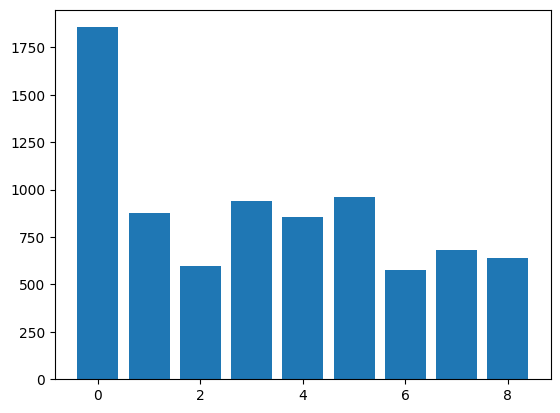

In [66]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = new_df['Path'], new_df['Label']
 #label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()



So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [67]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [68]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7984 files belonging to 9 classes.
Using 6388 files for training.


#### **Todo:** Create a validation dataset

In [69]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7984 files belonging to 9 classes.
Using 1596 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [72]:
from tensorflow.keras.layers import BatchNormalization
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(3,3),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [73]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [74]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 78s 182ms/step - accuracy: 0.2720 - loss: 2.0279 - val_accuracy: 0.4142 - val_loss: 1.5856
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.4450 - loss: 1.5142 - val_accuracy: 0.4712 - val_loss: 1.4055
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.5181 - loss: 1.3269 - val_accuracy: 0.5207 - val_loss: 1.4875
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.5624 - loss: 1.2165 - val_accuracy: 0.6128 - val_loss: 1.0795
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - accuracy: 0.6265 - loss: 1.0138 - val_accuracy: 0.6479 - val_loss: 0.9824
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.6897 - loss: 0.8736 - val_accuracy: 0.6905 - val_loss: 0.9389
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.7592 - loss: 0.6686 - val_accuracy: 0.7406 - val_loss: 0.7978
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - accuracy: 0.7857 - loss: 0.5944 -

#### **Todo:**  Visualize the model results

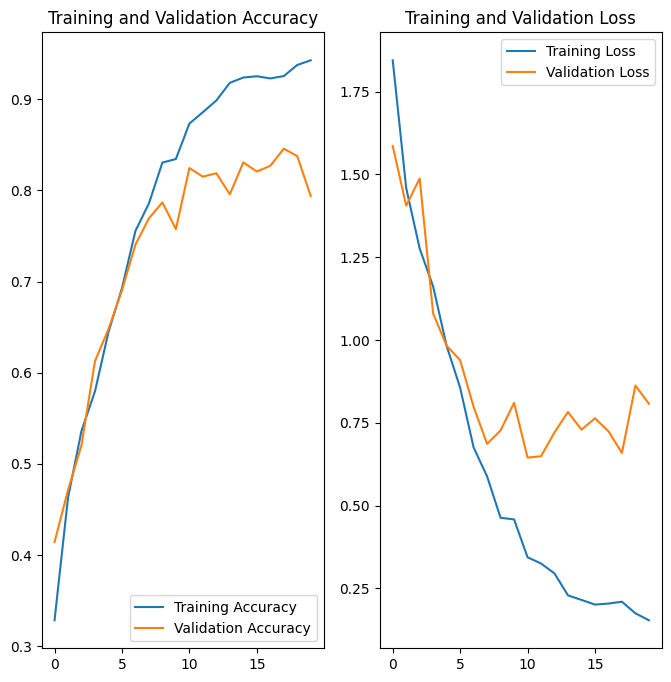

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [76]:
# We see that model performance has been improved after generating the images.
#The rebalancing of the class played a significant role in mitigating overfitting of the data, resulting in a decrease in loss. However, the approach also resulted in a notable decrease in accuracy.

#In the beginning, we experimented without utilizing the ImageDataGenerator, which led to a high degree of overfitting in the data. Subsequently, we implemented dropout and the ImageDataGenerator, which helped to reduce overfitting.
